
# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Tuesday, February 6 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

## <font color='red'>Osman Fatih Kilic</font>
## <font color='red'>UT EID: ok2439</font>

# Question 1: TED Talk (5 pts)
Watch the video at https://www.ted.com/talks/anthony_goldbloom_the_jobs_we_ll_lose_to_machines_and_the_ones_we_won_t
1. List two of the tasks mentioned in the video that machine learning is being used to automate.
2. What kind of machine learning procedures were used for each of these tasks (classification, regression, clustering etc.)?


## Answer

#### 1) Assesing credit risk from applications
        - Regression
#### 2) Hand-written digit recognition
        - Classification

# Question 2: Maximum Likelihood Estimation (5pts)
Consider the following continuous univariate probability distribution involving a single parameter $\lambda$.

$$P(x_i; \lambda) = \lambda e^{-\lambda x_i}, ~~~ x_i \geq 0 $$, and zero elsewhere.

Given N data points $x_1, x_2, \ldots x_N$ drawn i.i.d. from this distribution, derive the MLE estimate for $\lambda$, in terms of $x_1, x_2, \ldots x_N$.

## Answer
The likelihood of the given dataset is

$$P(x_1,\cdots,x_N; \lambda) = \prod_{i=1}^{N}\lambda e^{-\lambda x_i} $$ and the log-likelihood is
$$-\log(P(x_1,\cdots,x_N; \lambda)) = -\log(\prod_{i=1}^{N}\lambda e^{-\lambda x_i})  \\
= \sum_{i=1}^N \lambda x_i - \log(\lambda) \\
= -N\log(\lambda)+\lambda\sum_{i=1}^N x_i$$
Minimize the negative log-likelihood to find MLE of $$\lambda$$
$$\lambda^* = \arg\min_{\lambda} \{-N\log(\lambda)+\lambda\sum_{i=1}^N x_i\} $$
Take the derivative of objective function and equate to zero
$$\frac{\partial(.)}{\partial \lambda} = -\frac{N}{\lambda} + \sum_{i=1}^N x_i = 0$$
$$\Rightarrow \lambda^* = \frac{N}{\sum_{i=1}^N x_i} $$

### Question 3: Bivariate Normal Distribution (15pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0$
2. $\sigma_x^2 = 4; \sigma_y^2 = 9; \rho = 0.5$

a. (4 pts) Obtain contour plots for each of the two distributions using  Python.  (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (3 pts) View 3-D plots for the two distributions (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (3 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

d. (3 pts) 

i) Consider a multivariate normal distribution of $X_1$, $X_2$,... $X_k$, $X$. What can be said of the probability distribution of the $Y = R*X + t$?


ii) From this, how can one compute the marginal probability of $(X_1,... X_m)$ for some $m < k$? What can be said of the probability distribution of this subset?
## Answer


In [2]:
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.random.seed(10)

### (a) Contour Plot of the Distributions

In [3]:
# First Case
sigma_x = 2
sigma_y = 4
rho = 0
cov_matrix1 = [[sigma_x**2,sigma_x*sigma_y*rho],[sigma_x*sigma_y*rho,sigma_y**2]]
x1,y1 = np.random.multivariate_normal([0,0],cov_matrix1,50000).T

# Second Case
sigma_x = 2
sigma_y = 3
rho = 0.5
cov_matrix2 = [[sigma_x**2,sigma_x*sigma_y*rho],[sigma_x*sigma_y*rho,sigma_y**2]]
x2,y2 = np.random.multivariate_normal([0,0],cov_matrix2,50000).T

Text(0.5,1,u'Case 1')

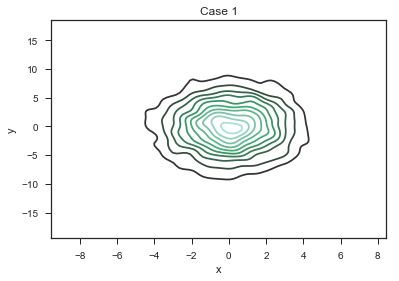

In [23]:
# Contour Plot for the first case
ax1 = sns.kdeplot(x1,y1)
ax1.set(xlabel='x',ylabel='y')
ax1.set_title('Case 1')

Text(0.5,1,u'Case 2')

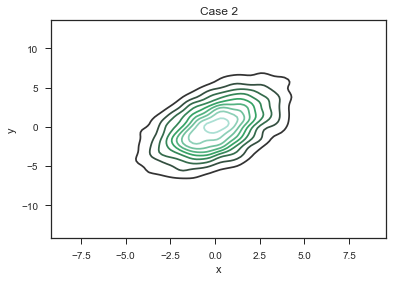

In [24]:
# Contour Plot for the second case
ax2 = sns.kdeplot(x2,y2)
ax2.set(xlabel='x',ylabel='y')
ax2.set_title('Case 2')

### (b) 3-D Plots of the Distributions

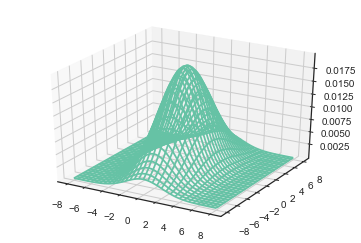

In [42]:
# 3-D Plot of PDFS
# First Case
x, y = np.mgrid[-8:8:.01, -8:8:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0., 0.], cov_matrix1)
z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z,rstride=50,cstride=50)

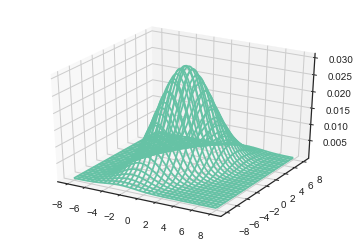

In [41]:
# 3-D Plot of PDFS
# Second Case
x, y = np.mgrid[-8:8:.01, -8:8:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0., 0.], cov_matrix2)
z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z,rstride=50,cstride=50)

### (c) Rotated Distribution

In [4]:
# Using the second case dist. in part (a)
u2x =  np.cos(-np.pi/4)*x2
u2y = np.sin(-np.pi/4)*y2
u2 = np.subtract(u2x,u2y)

v2x = np.sin(-np.pi/4)*x2
v2y = np.cos(-np.pi/4)*y2
v2 = np.add(v2x,v2y)

Text(0.5,1,u'Contour Plot of the Rotated Data')

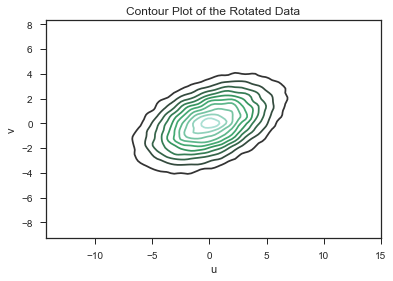

In [10]:
# Contour Plot for the second case
ax2 = sns.kdeplot(u2,v2)
ax2.set(xlabel='u',ylabel='v')
ax2.set_title('Contour Plot of the Rotated Data')

In [8]:
# Fit Bivariate Gaussian to rotated data
mu = np.mean(np.stack([u2,v2],1),0)
sig = np.cov(np.stack([u2,v2],1),rowvar=False)
print 'Fitted Gaussian mean vector is:', mu
print 'Fitted Gaussian covariance matrix is:', sig

Fitted Gaussian mean vector is: [-0.00993441 -0.00245034]
Fitted Gaussian covariance matrix is: [[ 9.54151737  2.50586487]
 [ 2.50586487  3.47226036]]


Note that the resulting mean vector is equal to $\mu_{rotated} = \mu_{original}$ since we had a zero mean vector and if we define $$R = \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right]$$  then the resulting covariance matrix is equal to
$$\Sigma_{rotated} = R \Sigma_{original} R^{T}$$.


The fluctuations are the result of random sampling.

Text(0.5,0.92,u'Wireframe Plot of Rotated Distribution')

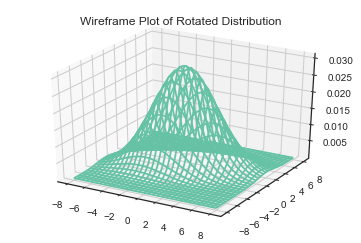

In [9]:
# Plot wireframe of the fitted Gaussian
x, y = np.mgrid[-8:8:.01, -8:8:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mu, sig)
z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z,rstride=50,cstride=50)
ax.set_title('Wireframe Plot of Rotated Distribution')

### (d) Multivariate Normal Distribution

#### (i)
Assuming a joint probability for X as $X = (X_1,X_2,\cdots,X_n)\sim N(\mu_x,\Sigma_x)$. Therefore, we find the distribution of $Y = R\times X + t$ as $$Y\sim N(R \mu_x+t,R \Sigma_x R^T)$$

#### (ii)
We can find the X back from Y such that $$X = R^{-1}(Y-t) \sim N(\mu_x,\Sigma_x)$$
From this we can find the marginal joint distribution by integrating over $(X_{m+1},X_{m+2},\cdots,X_k)$ <br />
If $(X_1,\cdots,X_k)$ are i.i.d. then, distributions become decoupled and no integration needed.

# Question 4: Multiple Linear Regression in Python (25 pts)

In this problem, you will perform linear regression using ordinary least squares on the dow_jones_index data, to predict 'next_weeks_open'. The dataset is attached in the homework. Some useful libraries have been attached in the starter code. 

a.  (5 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on 'percent_change_price' and 'percent_change_volume_over_last_wk' using the entire dataset (2 columns and all the rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html. 

b.  (5 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

c. (10 pts) Now repeat a. and b. using "open", "high", "low", "close", "percent_change_price", "percent_change_volume_over_last_wk" as features. What difference do you observe?

d.  (5 pts) Using the features in c, split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

## Answer

In [30]:
% matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### (a)
We first use the features 'percent_change_price','percent_change_volume_over_last_wk' only. We extract these features and convert them to numerical values and fit MLR model on the features that predicts target values. We then evaluate the performance of the model by MSE and R2-scores.

In [31]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna(subset=['percent_change_price','percent_change_volume_over_last_wk'])
# Target Values
y = df['next_weeks_open']
y = y.str[1:]
y = y.astype(float)
# Features
x = df[['percent_change_price','percent_change_volume_over_last_wk']]

In [32]:
model_mlr = linear_model.LinearRegression()
res = model_mlr.fit(x,y)

In [33]:
pred_mlr = res.predict(x)
mse_mlr = mean_squared_error(y,pred_mlr)
r2_mlr = r2_score(y,pred_mlr)
print 'MSE: %f and R2 Score: %f' %(mse_mlr, r2_mlr)

MSE: 1068.786439 and R2 Score: 0.012399


Note that we have a very low R2-Score. This can be an indicator of the model is working poorly. Next, we investigate the distribution of the residuals in order to verify our assumptions when we are building our MLR model.
### (b)

In [34]:
resid = list()
vals = y.tolist()
for i in range(len(vals)):
    resid.append((vals[i]-pred_mlr[i]))

[Text(0,0.5,u'Counts'), Text(0.5,0,u'Residuals')]

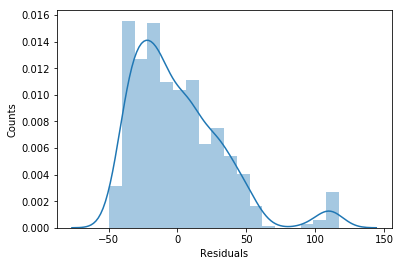

In [35]:
ax = sns.distplot(resid)
ax.set(xlabel='Residuals',ylabel='Counts')

As we see from the distribution of the residuals above, they do not follow a Gaussian assumption that we made constructing the MLR model. Therefore, MLR might not be the best model to select or some pre-processing needed for MLR to work better. For instance, taking the log-transform of the skewed numeric values in our dataset in order to get rid of the skewness can be one of the possible pre-processing steps. We apply this pre-processin next just for fun!

In [36]:
# Log-transform the skewed data
all_data = pd.concat([y,x],axis=1)
skewed_feats = all_data.apply(lambda c: sts.skew(c.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skew_ind = skewed_feats.index
all_data[skew_ind] = np.log1p(all_data[skew_ind])
all_data = all_data.dropna()
all_data.head()
y = all_data['next_weeks_open']
x = all_data[['percent_change_price','percent_change_volume_over_last_wk']]

In [37]:
# Fit MLR model to pre-processed data
model_mlr = linear_model.LinearRegression()
res = model_mlr.fit(x,y)
pred_mlr = res.predict(x)
mse_mlr = mean_squared_error(y,pred_mlr)
r2_mlr = r2_score(y,pred_mlr)
print 'MSE: %f and R2 Score: %f' %(mse_mlr, r2_mlr)

MSE: 0.372802 and R2 Score: 0.015896


We observe that there is a significant decrease in MSE, but only slight increase in R2-score. We also check the residuals for this case in the following.

[Text(0,0.5,u'Counts'), Text(0.5,0,u'Residuals')]

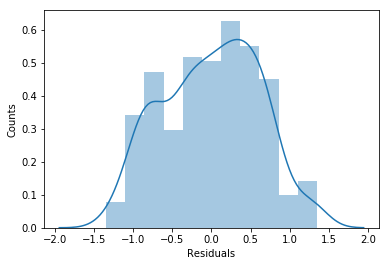

In [38]:
resid = list()
vals = y.tolist()
for i in range(len(vals)):
    resid.append((vals[i]-pred_mlr[i]))
ax = sns.distplot(resid)
ax.set(xlabel='Residuals',ylabel='Counts')    

Note that the distribution of residuals are more suitable for MLR assumptions. Therefore, we observed better MSE results.

### (c)
Now we use more features for constructing our MLR model. Increasing number of features can be beneficial if they help us increase the variance of the target value explained. However, there are several other pitfalls for using excessive features, which we do not cover here. <br />
Here, we again first extract the features and convert them into numerical values. Then, we fit an MLR model on the data and evaluate using MSE and R2-scores.

In [55]:
df = pd.read_csv('dow_jones_index.data')
df = df.dropna(subset=['percent_change_price','percent_change_volume_over_last_wk','open','high','low','close'])
# Target Values
y = df['next_weeks_open']
y = y.str[1:]
y = y.astype(float)
# Features
x = df[['percent_change_price','percent_change_volume_over_last_wk','open','high','low','close']]
nonnumeric_feats = x.dtypes[x.dtypes == "object"].index
x[nonnumeric_feats] = x[nonnumeric_feats].apply(lambda c: c.str[1:])

In [56]:
# Fit MLR model
model_mlr = linear_model.LinearRegression()
res = model_mlr.fit(x,y)

In [57]:
pred_mlr = res.predict(x)
mse_mlr = mean_squared_error(y,pred_mlr)
r2_mlr = r2_score(y,pred_mlr)
print 'MSE: %f and R2 Score: %f' %(mse_mlr, r2_mlr)

MSE: 0.177656 and R2 Score: 0.999836


We observe that MSE has significantly dropped and R2-score has significantly increased compared to the former model.

In [58]:
resid = list()
vals = y.tolist()
for i in range(len(vals)):
    resid.append((vals[i]-pred_mlr[i]))

[Text(0,0.5,u'Counts'), Text(0.5,0,u'Residuals')]

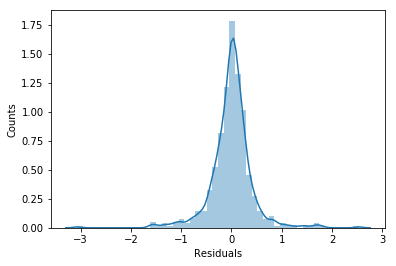

In [59]:
ax = sns.distplot(resid)
ax.set(xlabel='Residuals',ylabel='Counts')

Note that the residuals have a better approximation of a Gaussian distribution with a much less variance. Therefore it is expected to MRL to perform better. Also we can observe from MSE and R2-scores that the model performs better with the extra features.

### (d)
We now split our dataset into training and test dataset. We do this in order to simulate the performance of MLR model for the real-life applications where we do not have the target values.

In [68]:
# Test - Train split over data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.444)
# Train MLR Model
model_mlr = linear_model.LinearRegression()
res = model_mlr.fit(X_train,y_train)

In [69]:
# Test MLR Model
pred_mlr = res.predict(X_test)
mse_mlr = mean_squared_error(y_test,pred_mlr)
r2_mlr = r2_score(y_test,pred_mlr)
print 'MSE: %f and R2 Score: %f' %(mse_mlr, r2_mlr)

MSE: 0.221215 and R2 Score: 0.999812


Note that MSE has increased and R2-score has decreased a little, but the model still shows a good performance. This is expected since the model is now trained on less data and tested on a data that it has not seen before.